In [1]:
#import libraries to support data processing, analysis, and visualizations 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import roc_curve
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
#read in the training and test data to pandas dataframes
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#define functions for plotting the MNIST digits 
#MNIST takes a dataframe and row number as arguments and plots the image for that row
def plot_MNIST(training_data, row_number):
    digit_data = training_data.iloc[row_number,1:785]
    digit_array = np.array(digit_data)
    digit_square_array = np.reshape(digit_array, (28, 28))
    plt.imshow(digit_square_array, cmap='Greys', interpolation='nearest')

#MNIST2 takes a dataframe and numerical value as arguments, filters the data frame for the value passed 
#and plots the image for the first row that corresponds to that value
def plot_MNIST2(training_data, value):
    training_data_filtered = training_data[training_data["label"]==value]
    digit_data = training_data_filtered.iloc[1,1:]
    digit_array = np.array(digit_data)
    digit_square_array = np.reshape(digit_array, (28, 28))
    plt.imshow(digit_square_array, cmap='Greys', interpolation='nearest')

Text(0, 0.5, 'Pixel j')

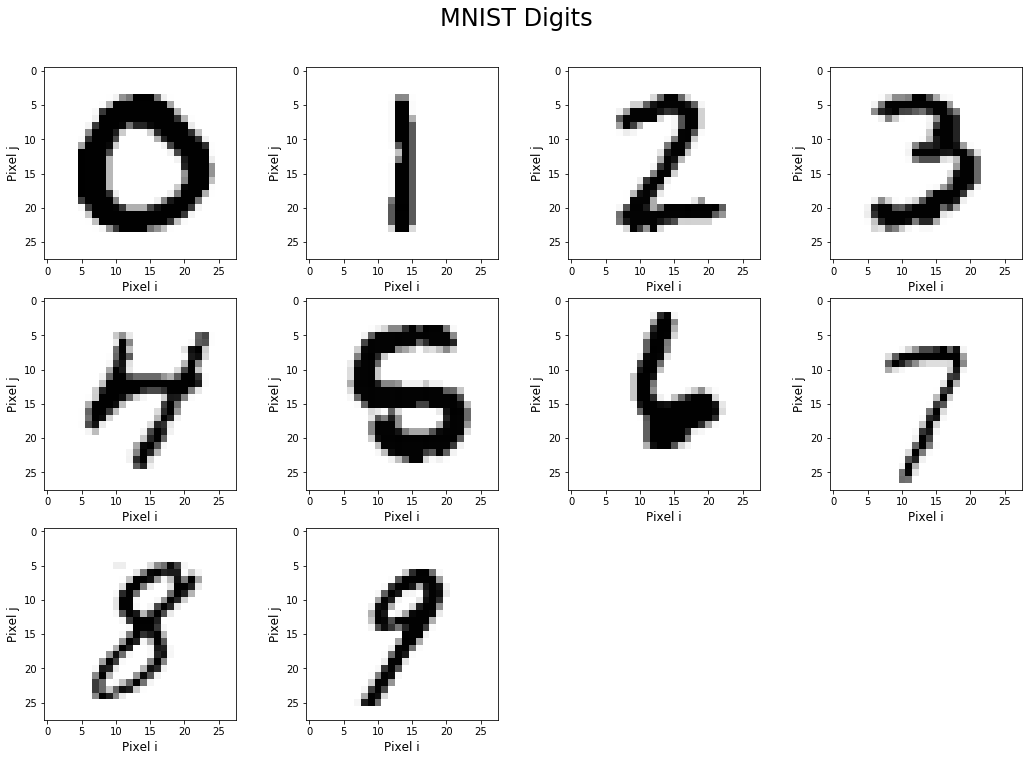

In [4]:
#set up a figure to store the subplots for each of the values 0-9
fig = plt.figure(figsize=(18,12))
fig.suptitle('MNIST Digits', fontsize=24, y = 0.95)

#use the MNIST2 function to plot each value from 0-9
plt.subplot(3, 4, 1)
plot_MNIST2(df_train, 0)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 2)
plot_MNIST2(df_train, 1)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 3)
plot_MNIST2(df_train, 2)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 4)
plot_MNIST2(df_train, 3)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 5)
plot_MNIST2(df_train, 4)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 6)
plot_MNIST2(df_train, 5)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 7)
plot_MNIST2(df_train, 6)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 8)
plot_MNIST2(df_train, 7)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 9)
plot_MNIST2(df_train, 8)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

plt.subplot(3, 4, 10)
plot_MNIST2(df_train, 9)
plt.xlabel('Pixel i', fontsize=12)
plt.ylabel('Pixel j', fontsize=12)

Text(0, 0.5, 'Normalized Count')

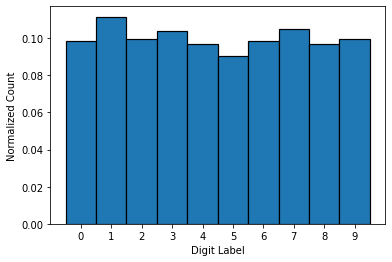

In [5]:
#evaluate the normalized count of each of the respective image labels
#create bin_array and ticks to store the desired bins and tickmarks for the histogram plot 
bin_array = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.hist(df_train["label"], bins = bin_array, density = True,
         edgecolor='black', linewidth=1.2, align = 'left')
plt.xticks(ticks)
plt.xlabel("Digit Label")
plt.ylabel("Normalized Count")

In [6]:
#define a distance function that receives a dataframe and a row
#for the input row, the distance is calculated to all other rows in the dataframe
#the index of the minimum distance is found (ignores distance to itself)
#returns an array of the index of the closest neighbor and the distance to that neighbor
def dist(data, row):
    data = data.iloc[:, 1:]
    pixels1 = data.iloc[row,:]
    
    data = data.to_numpy()
    pixels1 = pixels1.to_numpy()
    
    dist_matrix = euclidean_distances(data, pixels1.reshape(1, -1))
    dist_matrix = dist_matrix.transpose()
    
    row_knn = dist_matrix[0]
    
    neighbor = np.argpartition(row_knn, 1)
    neighbor_index = neighbor[1]
    
    return [neighbor_index, row_knn[neighbor_index]]

In [7]:
#for each value from 0-9 find the first row that has the respective label
#call the dist function to find the index of the row with the smallest distance to the row in question
#if the label of the row with closest distance matches the label of the row in question print both labels and distance
#if the labels don't match, still print, but highlight this error with asterisks
for i in range(10):
    row = 0
    for j in range(len(df_train)):
        if df_train.iloc[j,0] == i:
            row = j
            break
    
    if df_train.iloc[row,0] == df_train.iloc[dist(df_train, row)[0],0]:
        error = ""
        print(error, "    Actual Label: ", df_train.iloc[row,0], ", ", "Closest Neighbor Label: ", 
          df_train.iloc[dist(df_train, row)[0],0], " ", "Distance: ", dist(df_train, row)[1], error) 
    else:
        error = "***"
        print(error, " Actual Label: ", df_train.iloc[row,0], ", ", "Closest Neighbor Label: ", 
              df_train.iloc[dist(df_train, row)[0],0], " ", "Distance: ", dist(df_train, row)[1], error)          

     Actual Label:  0 ,  Closest Neighbor Label:  0   Distance:  1046.5954328201515 
     Actual Label:  1 ,  Closest Neighbor Label:  1   Distance:  489.67948701165744 
     Actual Label:  2 ,  Closest Neighbor Label:  2   Distance:  1380.877257398354 
***  Actual Label:  3 ,  Closest Neighbor Label:  5   Distance:  1832.6649993929605 ***
     Actual Label:  4 ,  Closest Neighbor Label:  4   Distance:  1356.8809822530493 
     Actual Label:  5 ,  Closest Neighbor Label:  5   Distance:  1066.3676664265472 
     Actual Label:  6 ,  Closest Neighbor Label:  6   Distance:  1446.5113203843239 
     Actual Label:  7 ,  Closest Neighbor Label:  7   Distance:  863.5010133172977 
     Actual Label:  8 ,  Closest Neighbor Label:  8   Distance:  1593.7775879965184 
     Actual Label:  9 ,  Closest Neighbor Label:  9   Distance:  910.5767403135224 


In [8]:
#create a dataframe of just the rows with labels 0 and 1 and convert it to a numpy array
#create a dataframe of just the labels for those rows and convert it to a numpy array
df_train_0_1 = df_train.loc[df_train['label'] <= 1]
df_train_0_1 = df_train_0_1.sort_values(["label"], axis=0, ascending=True) 

df_train_0_1_label = df_train_0_1.iloc[:,0].to_numpy()
df_train_0_1 = df_train_0_1.iloc[:,1:785].to_numpy()

In [9]:
#calculate a distance matrix for each point to all other possible points
#use the same matrix calculation method for the labels to identify imposters and genuines
#genuines will have a value of 0 in the labels_matrix and imposters will have a value of 1
distances_matrix_0_1 = euclidean_distances(df_train_0_1)
labels_matrix_0_1 = euclidean_distances(df_train_0_1_label.reshape(-1, 1))

In [10]:
#fill genuines and imposters lists with the corresponding distances from the distance matrix
#genuines will have a value of 0 in the labels_matrix and imposters will have a value of 1
genuines = list()
imposters = list()

for i in range(len(df_train_0_1_label)):
    for j in range(len(df_train_0_1_label)):
        if labels_matrix_0_1[i][j] == 0:
            genuines.append(distances_matrix_0_1[i][j])
        else:
            imposters.append(distances_matrix_0_1[i][j])

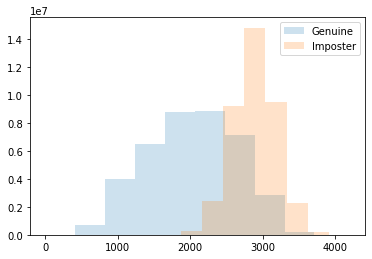

In [11]:
#plot histograms of the genuines and imposters lists to view distributions 
plt.hist(genuines, alpha=0.22, label='Genuine')
plt.hist(imposters, alpha=0.22, label='Imposter')
plt.legend(loc='upper right')

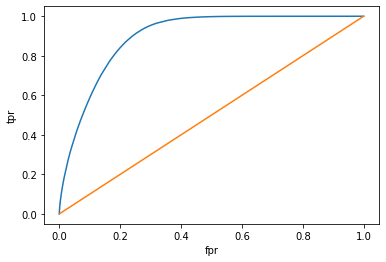

In [12]:
#create array that will be passed for y_true parameter accepted by the roc_curve function 
#this will be the binary labels for genuine and imposter

#create two numpy arrays - one of len(genuines) filled with zeros and other of len(imposters) filled with ones
genuine_labels_np = np.zeros((1,len(genuines)))
imposter_labels_np = np.ones((1,len(imposters)))

#create one full array that combines the genuine and imposter binary label value
true_binary_labels_np = np.append(genuine_labels_np,imposter_labels_np)

#convert the genuine and imposter lists storing the distances to numpy arrays
genuine_np = np.array(genuines)
imposter_np = np.array(imposters)

#combine both numpy arrays to have one full numpy array of the distances to be passed as y_score
genuine_imposter_np = np.append(genuine_np,imposter_np)

#call the roc_curve function with the two numpy arrays from above as parameters and store the return values
fpr, tpr, thresholds = roc_curve(true_binary_labels_np,genuine_imposter_np)

#plot the curve
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [13]:
#calculate the equal error rate by finding the point where fnr-fpr is minimized
EER = fpr[np.argmin(np.absolute(((1-tpr) - fpr)))]
EER

0.18554784422124979

In [14]:
#implementing a KNN classifier 
#calculate the distance matrix for all points between train and test set
#for each test point, the indices for the k smallest distances are identified using argpartition
#the labels for those indices are extracted and then the mode (most common label) is the value saved 
#an array of a value (mode of labels) for each test point is returned
def knn_fun(k_value, df_train, df_test, train_labels):
       
    dist_matrix = euclidean_distances(df_train, df_test)
    dist_matrix = dist_matrix.transpose()

    pred_array = np.empty(len(dist_matrix))
    pred_array[:] = -1
    k_val = k_value
    
    for n in range(len(dist_matrix)):
    
        row_knn = dist_matrix[n]
     
        neighbors = np.argpartition(row_knn, k_val)
        k_neighbors = neighbors[0:k_val]
        
        k_neighbors = train_labels[k_neighbors].to_numpy()
        pred_label = stats.mode(k_neighbors, axis = None)[0][0]
        
        pred_array[n] = pred_label
    
    return pred_array

In [15]:
#create labels df, drop label from df_train, convert df_train to numpy array
df_train_labels = df_train['label']
df_train = df_train.drop(columns = 'label')
df_train = df_train.to_numpy()

In [16]:
#split the train test into 50 percent train and 50 percent test
#reset the indices of the train and test labels for consistency 
X_train, X_test, Y_train, Y_test = train_test_split(df_train, df_train_labels, test_size=0.5, random_state=42)

Y_train = Y_train.reset_index().iloc[:,1]
Y_test = Y_test.reset_index().iloc[:,1]

In [17]:
#trains our knn classifier (k is 5) with the train set, producing predictions for the test points
test_predictions = knn_fun(5, X_train, X_test, Y_train)

In [18]:
#accuracy score for our test set predictions 
accuracy_score(Y_test, test_predictions)

0.9596190476190476

In [19]:
#the code for this confusion matrix plotting function was found at the following link
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.
#html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#however, it was modified quite a lot for visual changes 
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None: cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=10)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", 
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('\nPredicted label'.format(accuracy, misclass))
    plt.show()

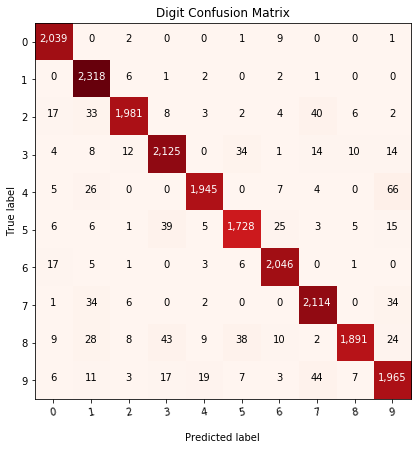

In [20]:
#create a confusion matrix for our actual test labels and predicted test labels 
#uses confusion matrix function defined above to create a visual representation of it 
plot_confusion_matrix(cm = confusion_matrix(Y_test, test_predictions), target_names = 
                      ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], title = "Digit Confusion Matrix")

In [21]:
#convert df_test to a numpy array
df_test = df_test.to_numpy()

#trains our knn classifier (k is 5) with the total train set, producing predictions for the total test set
knn_predictions = knn_fun(5, df_train, df_test, df_train_labels)

In [22]:
#turns our prediction values into a 2-column dataframe with image-id (1-28000) and corresponding predicted labels
#exports this dataframe to a csv
knn_predictions_df = pd.DataFrame(knn_predictions.astype(int), columns = ['Label'])
knn_predictions_df['ImageId'] = knn_predictions_df.index + 1
knn_predictions_df = knn_predictions_df[['ImageId', 'Label']]
knn_predictions_df.to_csv(r'export_df_Kadosh.csv', index = None, header=True)